In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint

In [2]:
file_path = Path("round-4-island-data-bottle")

In [3]:
if file_path.exists():
    # Read the CSV file
    df_day_1 = pd.read_csv(
        file_path / "trades_round_4_day_1_nn.csv", delimiter=";"
    )  # day 0
    df_day_2 = pd.read_csv(
        file_path / "trades_round_4_day_2_nn.csv", delimiter=";"
    )  # day 1
    df_day_3 = pd.read_csv(
        file_path / "trades_round_4_day_3_nn.csv", delimiter=";"
    )  # day 2
    print("File loaded successfully.")
else:
    print("File not found. Please ensure the file exists at:", file_path)

df_day_1["timestamp"] = pd.to_numeric(df_day_1["timestamp"])
df_day_2["timestamp"] = pd.to_numeric(df_day_2["timestamp"])
df_day_3["timestamp"] = pd.to_numeric(df_day_3["timestamp"])

df_day_3["timestamp"] += len(df_day_1["timestamp"]) + len(df_day_2["timestamp"])
df_day_2["timestamp"] += len(df_day_1["timestamp"])
df = pd.concat([df_day_1, df_day_2, df_day_3], ignore_index=True)

File not found. Please ensure the file exists at: round-4-island-data-bottle


NameError: name 'df_day_1' is not defined

In [60]:
df.head(10)

,timestamp,buyer,seller,symbol,currency,price,quantity
0,800,NaN,NaN,COCONUT_COUPON,SEASHELLS,636.0,5
1,900,NaN,NaN,COCONUT_COUPON,SEASHELLS,634.0,17
2,1100,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,17
3,1900,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,16
4,2000,NaN,NaN,COCONUT_COUPON,SEASHELLS,637.0,14
5,3000,NaN,NaN,COCONUT_COUPON,SEASHELLS,631.0,6
6,3900,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,2
7,3900,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,10
8,4200,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,20
9,4300,NaN,NaN,COCONUT_COUPON,SEASHELLS,635.0,2


In [59]:
df.tail(10)

,timestamp,buyer,seller,symbol,currency,price,quantity
5112,997230,NaN,NaN,COCONUT,SEASHELLS,9885.0,6
5113,997530,NaN,NaN,COCONUT,SEASHELLS,9883.0,9
5114,997730,NaN,NaN,COCONUT,SEASHELLS,9885.0,3
5115,998330,NaN,NaN,COCONUT,SEASHELLS,9885.0,9
5116,998930,NaN,NaN,COCONUT,SEASHELLS,9887.0,8
5117,999630,NaN,NaN,COCONUT_COUPON,SEASHELLS,585.0,14
5118,1000530,NaN,NaN,COCONUT,SEASHELLS,9885.0,9
5119,1000630,NaN,NaN,COCONUT,SEASHELLS,9883.0,8
5120,1002030,NaN,NaN,COCONUT,SEASHELLS,9887.0,5
5121,1003230,NaN,NaN,COCONUT_COUPON,SEASHELLS,575.0,14


In [28]:
COCONUT_df = df[df["symbol"] == "COCONUT"]
COCONUT_COUPON_df = df[df["symbol"] == "COCONUT_COUPON"]

In [29]:
COCONUT_price = COCONUT_df[["timestamp", "price", "quantity"]]
COCONUT_COUPON_price = COCONUT_COUPON_df[["timestamp", "price", "quantity"]]

In [36]:
COCONUT_price.describe()

,timestamp,price,quantity
count,1.967000e+03,1967.000000,1967.000000
mean,4.975230e+05,9998.987799,6.432639
std,2.876519e+05,89.051586,2.676793
min,5.130000e+03,9810.000000,1.000000
25%,2.509650e+05,9913.500000,5.000000
50%,4.924150e+05,10027.000000,7.000000
75%,7.402150e+05,10077.000000,9.000000
max,1.002030e+06,10141.000000,10.000000


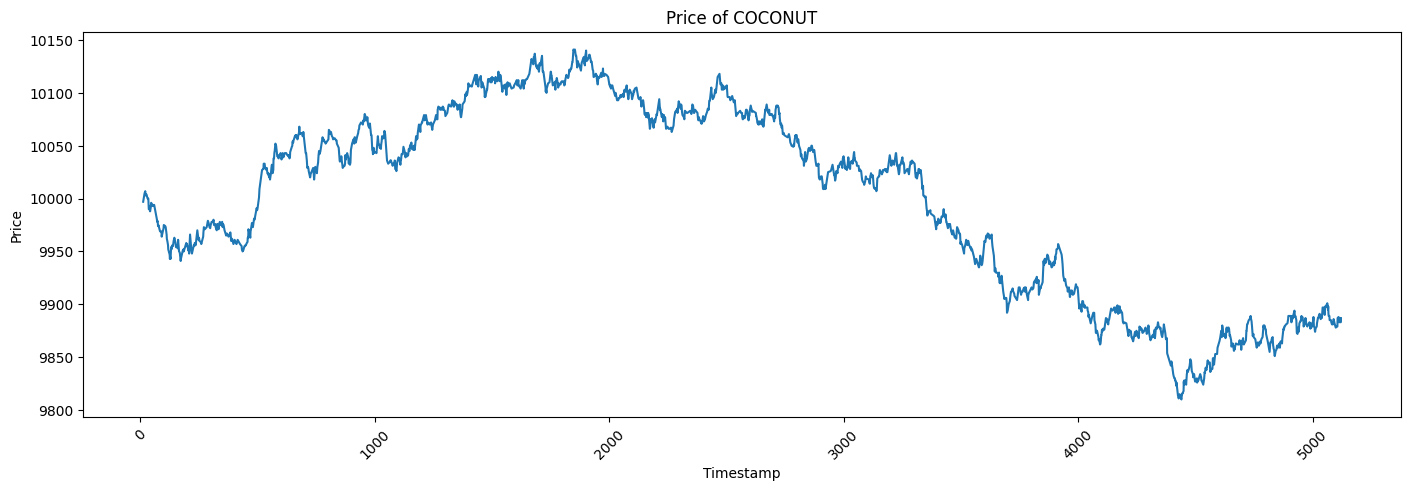

In [37]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(COCONUT_price["price"])
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of COCONUT")
plt.xticks(rotation=45)
plt.show()

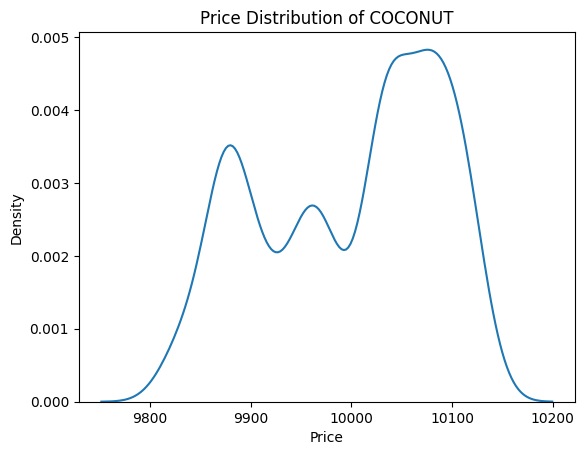

In [32]:
sns.kdeplot(COCONUT_price["price"])
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution of COCONUT")
plt.show()

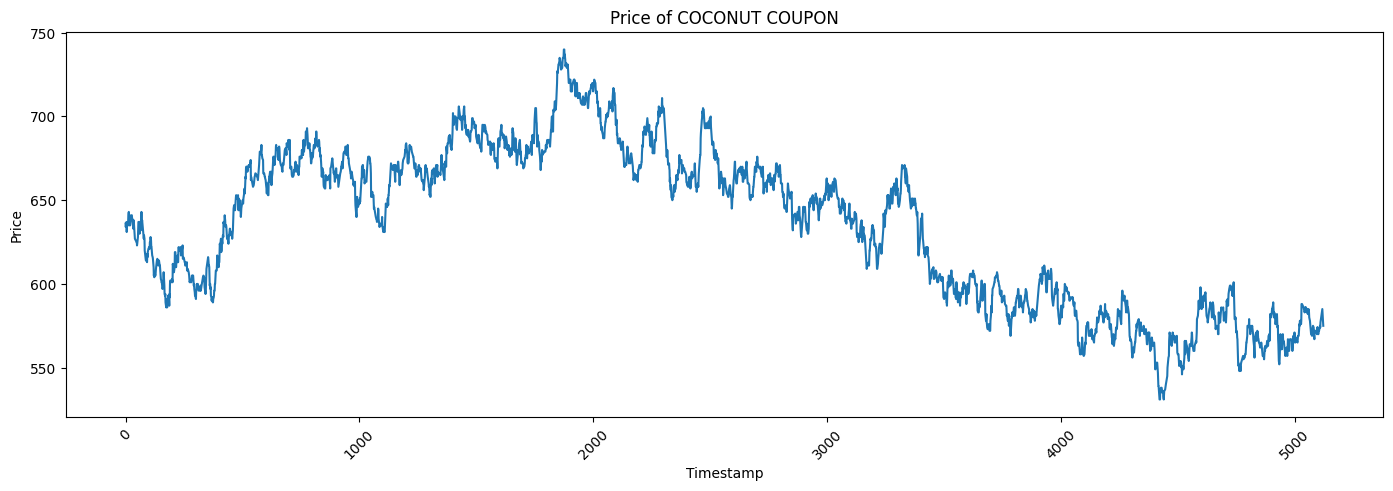

In [40]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(COCONUT_COUPON_price["price"])
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of COCONUT COUPON")
plt.xticks(rotation=45)
plt.show()

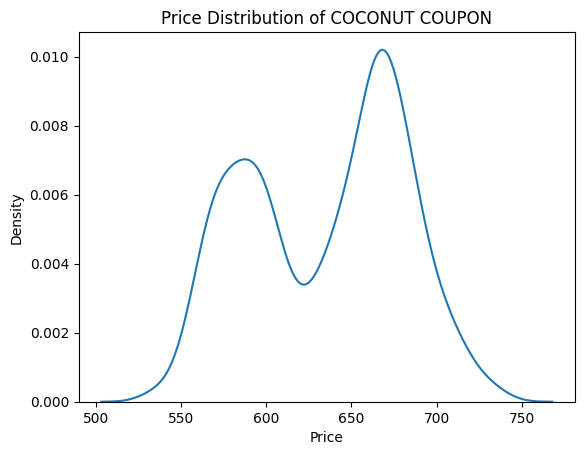

In [38]:
sns.kdeplot(COCONUT_COUPON_price["price"])
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution of COCONUT COUPON")
plt.show()

In [42]:
def printTestData(result):
    print(f"ADF Statistic: {result[0]}")
    print(f"n_lags: {result[1]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print("Critial Values:")
        print(f"   {key}, {value}")
    print("\n")

In [43]:
COCONUT_ADF = adfuller(COCONUT_price["price"], autolag="AIC")
printTestData(COCONUT_ADF)

ADF Statistic: -0.5448442448913384
n_lags: 0.8829644196039026
p-value: 0.8829644196039026
Critial Values:
   1%, -3.4336822458349143
Critial Values:
   5%, -2.863011992405672
Critial Values:
   10%, -2.567553628252692




In [44]:
COCONUT_COUPON_ADF = adfuller(COCONUT_COUPON_price["price"], autolag="AIC")
printTestData(COCONUT_COUPON_ADF)

ADF Statistic: -1.872785010830439
n_lags: 0.34497018590905737
p-value: 0.34497018590905737
Critial Values:
   1%, -3.4324256840496985
Critial Values:
   5%, -2.8624571096973295
Critial Values:
   10%, -2.5672581988257397




In [73]:
COCONUT_returns = np.log(
    COCONUT_price["price"] / COCONUT_price["price"].shift(-1)
).dropna()
COCONUT_drift = np.mean(COCONUT_returns)
COCONUT_volatility = np.std(COCONUT_returns)
COCONUT_COUPON_returns = np.log(
    COCONUT_COUPON_price["price"] / COCONUT_COUPON_price["price"].shift(-1)
).dropna()
COCONUT_COUPON_drift = np.mean(COCONUT_COUPON_returns)
COCONUT_COUPON_volatility = np.std(COCONUT_COUPON_returns)
print("COCONUT_drift: ", COCONUT_drift)
print("COCONUT_volatility: ", COCONUT_volatility)
print("COCONUT_COUPON_drift: ", COCONUT_COUPON_drift)
print("COCONUT_COUPON_volatility:; ", COCONUT_COUPON_volatility)

COCONUT_drift:  5.627815396769003e-06
COCONUT_volatility:  0.0004050435799965118
COCONUT_COUPON_drift:  3.196845990576189e-05
COCONUT_COUPON_volatility:;  0.005649806062108461


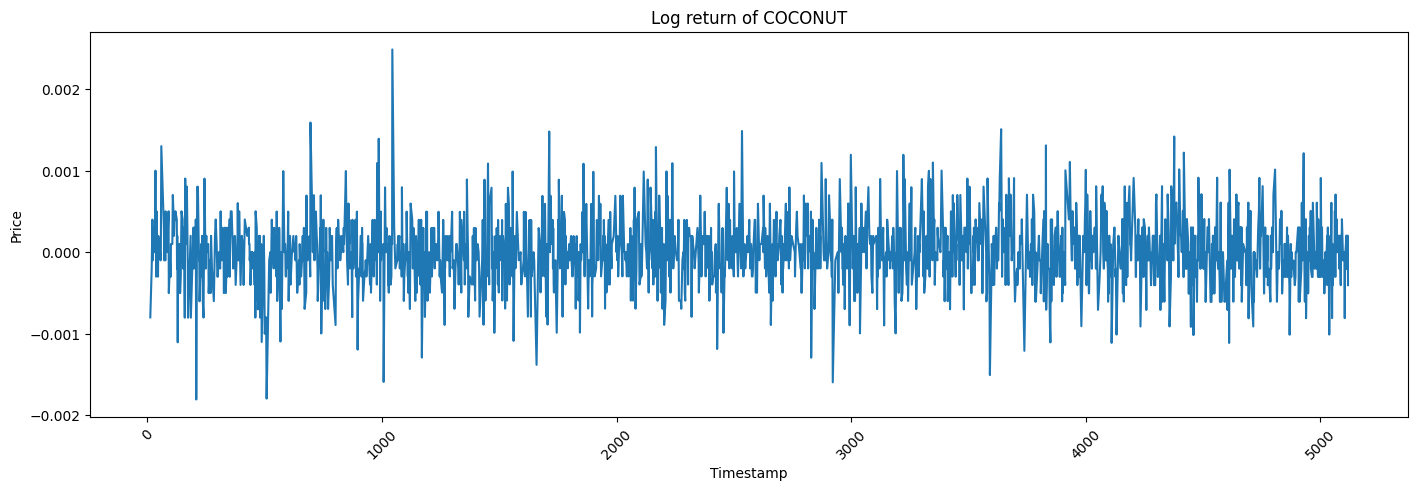

In [63]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(COCONUT_returns)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Log return of COCONUT")
plt.xticks(rotation=45)
plt.show()

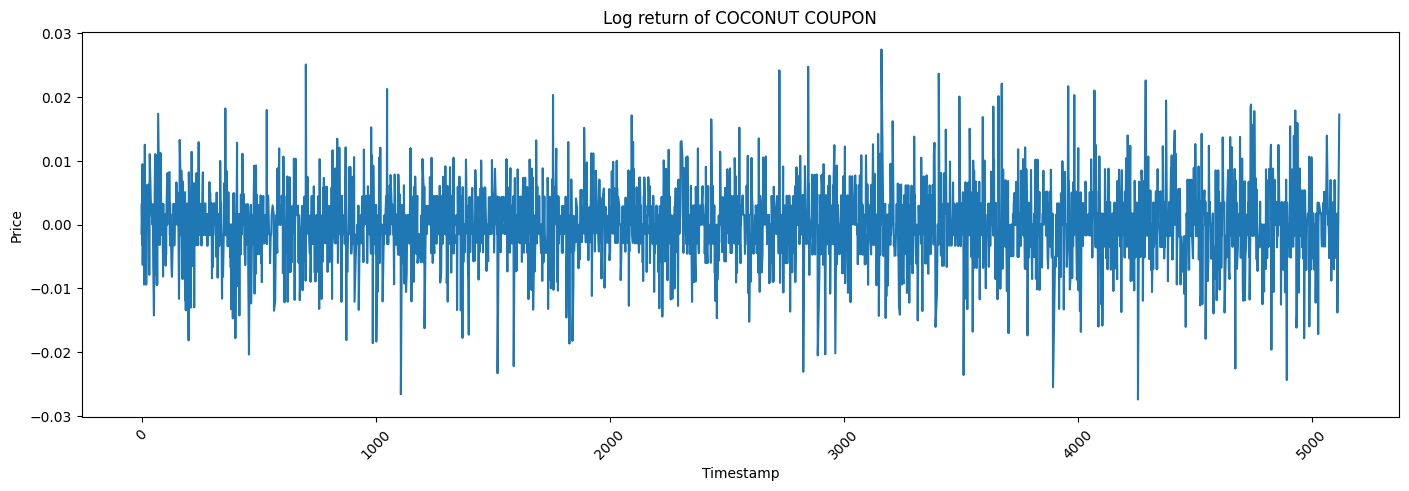

In [50]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(COCONUT_COUPON_returns)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Log return of COCONUT COUPON")
plt.xticks(rotation=45)
plt.show()

In [55]:
merged_data = pd.merge(COCONUT_price, COCONUT_COUPON_price, on="timestamp", how="inner")
overlap_length = len(merged_data)  # price_x = STARFRUIT, price_y = AMETHYSTS
overlap_start_time = merged_data["timestamp"].iloc[0]
overlap_end_time = merged_data["timestamp"].iloc[-1]
print(overlap_length)
print(merged_data)
overlap_timestamps = merged_data["timestamp"]
print(overlap_start_time, overlap_end_time)

202
     timestamp  price_x  quantity_x  price_y  quantity_y
0        48100   9969.0           8    615.0          10
1        88500   9949.0           9    593.0          20
2       102400   9958.0           8    601.0          15
3       102400   9958.0           8    601.0           5
4       108500   9948.0           5    607.0          11
..         ...      ...         ...      ...         ...
197     863630   9892.0           3    580.0          17
198     868830   9885.0           9    564.0          17
199     875630   9873.0           9    552.0          12
200     934330   9878.0           8    569.0          19
201     952130   9887.0           6    585.0          12

[202 rows x 5 columns]
48100 952130


In [76]:
correlation = merged_data["price_x"].corr(merged_data["price_y"])
print("Correlation:", correlation)
score, pvalue, _ = coint(merged_data["price_x"], merged_data["price_y"])
print("pvalue: ", pvalue)
print("score: ", score)
print("Critial Values: ")
print("1%: ", _[0])
print("5%: ", _[1])
print("10%: ", _[2])

Correlation: 0.9557438376258951
pvalue:  1.0994858870104755e-05
score:  -5.6046896326570215
Critial Values: 
1%:  -3.951756920373258
5%:  -3.366697389421054
10%:  -3.065617822578649


In [74]:
ratio = merged_data["price_x"] / merged_data["price_y"]

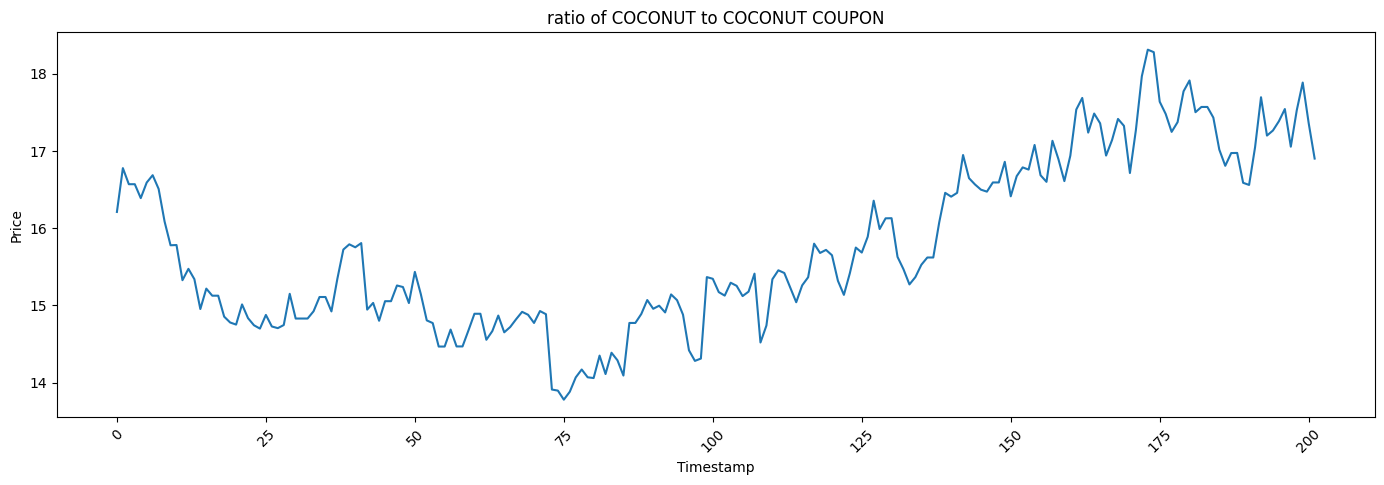

In [75]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(ratio)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("ratio of COCONUT to COCONUT COUPON")
plt.xticks(rotation=45)
plt.show()